<a href="https://colab.research.google.com/github/Abishek-077/AI-l-ML---PROJECTS/blob/main/Cleaning%26PreparingDataSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLeaning and Preparing the data

In [3]:
import pandas as pd

df = pd.read_csv\
                ('https://raw.githubusercontent.com/'\
                 'PacktWorkshops/The-Data-Science-'\
                 'Workshop/master/Chapter02/'\
                 'Dataset/Boston.csv')
print(df.head)
print(df.info)



<bound method NDFrame.head of         CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6

Checking The Missing Value

In [5]:
print(df.isnull())

      CRIM    ZN   INDUS    CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False   False  False  False  False  False  False  False  False   
1    False  False   False  False  False  False  False  False  False  False   
2    False  False   False  False  False  False  False  False  False  False   
3    False  False   False  False  False  False  False  False  False  False   
4    False  False   False  False  False  False  False  False  False  False   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False   False  False  False  False  False  False  False  False   
502  False  False   False  False  False  False  False  False  False  False   
503  False  False   False  False  False  False  False  False  False  False   
504  False  False   False  False  False  False  False  False  False  False   
505  False  False   False  False  False  False  False  False  False  False   

     PTRATIO  LSTAT   MEDV  
0      False  False  False  
1    

Sumilate Messy Data & Clean it (Pro-Level-Practice)

In [7]:
import numpy as np
# randomly set 20 values in 'AGE' and 'RM' to Nan
df.loc[df.sample(30).index, 'AGE'] = np.nan
df.loc[df.sample(30).index, 'RM'] = np.nan
print(df.isnull().sum())


CRIM        0
 ZN         0
INDUS       0
CHAS        0
NOX         0
RM         49
AGE        48
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
MEDV        0
dtype: int64


Step 3 : Clean it
A.Fill Missing age with Median

In [8]:
df['AGE']=df['AGE'].fillna(df['AGE'].median())


B. Drop Rows With Missing RM

In [9]:
df =df.dropna(subset=['RM'])


Step 4: Remove Outliners(eg.LSTAT)

In [10]:
Q1 = df['LSTAT'].quantile(0.25)
Q3 = df['LSTAT'].quantile(0.75)
IQR = Q3 - Q1
# Its gets The Third Quartile
# OR (Interqurtile)is the range of the middle 50% of the data

In [11]:
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR


. This Are Outilner Thresholds
. Any data point below Lower or above is consider an outlier

In [12]:
df = df[(df['LSTAT']>=lower) & (df['LSTAT']<=upper)]

Step 5: Standardize Columns

In [13]:
df.columns = df.columns.str.lower()

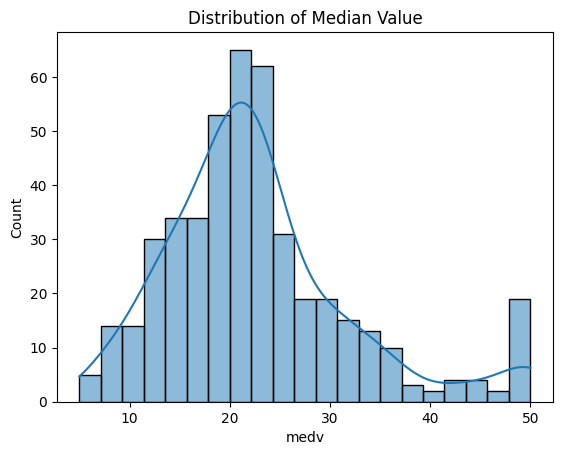

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['medv'],kde=True)
plt.title('Distribution of Median Value')
plt.show()